In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import models, layers, regularizers
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import scipy.stats as stats
import urllib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import scipy.stats
from sklearn.metrics import r2_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb

In [2]:
np.random.seed(0)
s = 117
_max = 500

In [3]:
data = pd.read_csv('./data_01.csv')
data.head(5)

,Laserpower,Scanspeed,LayerThickness,Stability,Width,Depth,ContactAngle,DenudationWidth
0,50,200,0,o,68.597444,NaN,NaN,NaN
1,100,200,0,o,133.185444,NaN,NaN,NaN
2,150,200,0,o,177.784333,NaN,NaN,NaN
3,200,200,0,o,186.593778,372.251333,29.420167,NaN
4,250,200,0,o,189.625000,500.697333,44.163167,NaN


In [4]:
print(data.shape)

(700, 8)


In [5]:
data_width = data.copy()
data_depth = data.copy()
data_CA = data.copy()
data_Deun = data.copy()

In [6]:
data_width = data_width.drop(['Depth', 'ContactAngle', 'DenudationWidth'], axis = 1).dropna()
data_depth = data_depth.drop(['Width', 'ContactAngle', 'DenudationWidth'], axis = 1).dropna()
data_CA = data_CA.drop(['Width', 'Depth', 'DenudationWidth'], axis = 1).dropna()
data_Deun = data_Deun.drop(['Width', 'Depth', 'ContactAngle'], axis = 1).dropna()

In [7]:
data_width.head(5)

,Laserpower,Scanspeed,LayerThickness,Stability,Width
0,50,200,0,o,68.597444
1,100,200,0,o,133.185444
2,150,200,0,o,177.784333
3,200,200,0,o,186.593778
4,250,200,0,o,189.625000


In [8]:
print(data_width.shape)
print(data_depth.shape)
print(data_CA.shape)
print(data_Deun.shape)

(338, 5)
(317, 5)
(318, 5)
(208, 5)


In [9]:
print(data_width.isnull().sum(axis = 0))
print(data_depth.isnull().sum(axis = 0))
print(data_CA.isnull().sum(axis = 0))
print(data_Deun.isnull().sum(axis = 0))

Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
Width               0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
Depth               0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
ContactAngle        0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
DenudationWidth     0
dtype: int64


# 1 Width

In [10]:
x_data = data_width.drop(["Width", "Stability"],axis=1,inplace=False)
y_data = data_width[["Width"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
0,50,200,0
1,100,200,0
2,150,200,0
3,200,200,0
4,250,200,0


In [11]:
y_data.head(5)

,Width
0,68.597444
1,133.185444
2,177.784333
3,186.593778
4,189.625000


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [13]:
xgbm = xgb.XGBRegressor(random_state=s, seed=s,silent=True)
scores_xgbm = cross_val_score(xgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_xgbm

array([0.28889456, 0.85673619, 0.60705094, 0.83002838, 0.79585153])

In [14]:
fitted_model = xgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

[19:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Test_R2 :  0.9345651568107833


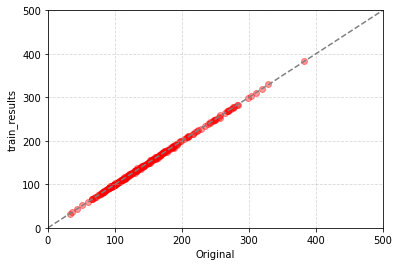

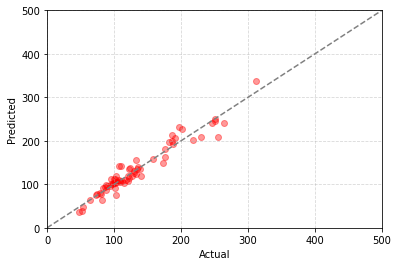

In [15]:
plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 2 Depth

In [16]:
x_data = data_depth.drop(["Depth","Stability"],axis=1,inplace=False)
y_data = data_depth[["Depth"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
3,200,200,0
4,250,200,0
5,300,200,0
6,350,200,0
7,400,200,0


[19:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Test_R2 :  0.869553731639336


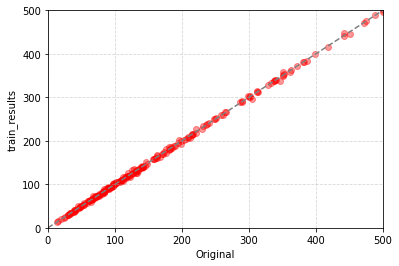

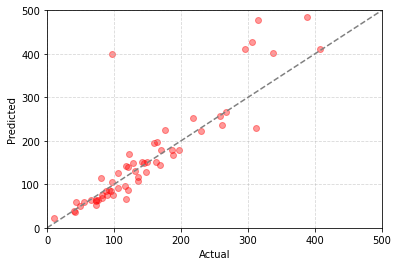

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

xgbm = xgb.XGBRegressor(random_state=s, seed=s,silent=True)
scores_lgbm = cross_val_score(xgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_lgbm

fitted_model = xgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 3 ContactAngle

In [18]:
data_CA.head(5)

,Laserpower,Scanspeed,LayerThickness,Stability,ContactAngle
3,200,200,0,o,29.420167
4,250,200,0,o,44.163167
5,300,200,0,o,50.371167
6,350,200,0,o,44.295667
7,400,200,0,o,48.996833


In [19]:
x_data = data_CA.drop(["ContactAngle","Stability"],axis=1,inplace=False)
y_data = data_CA[["ContactAngle"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
3,200,200,0
4,250,200,0
5,300,200,0
6,350,200,0
7,400,200,0


In [20]:
y_data.head(5)

,ContactAngle
3,29.420167
4,44.163167
5,50.371167
6,44.295667
7,48.996833


[-0.16185484 -5.63689025  0.03497017  0.6070223   0.83413049]
[19:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Test_R2 :  0.8026998069467175


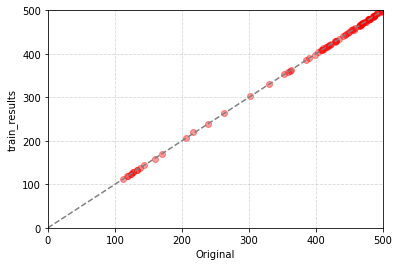

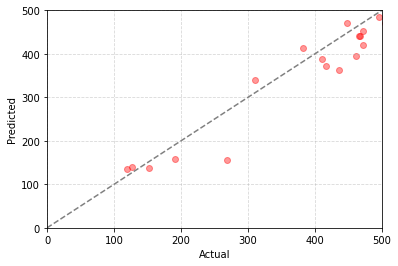

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

xgbm = xgb.XGBRegressor(random_state=s, seed=s,silent=True)
scores_xgbm = cross_val_score(xgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
print(scores_xgbm)

fitted_model = xgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 4 DenudationWidth

In [25]:
x_data = data_Deun.drop(["DenudationWidth","Stability"],axis=1,inplace=False)
y_data = data_Deun[["DenudationWidth"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
101,100,200,20
102,150,200,20
103,200,200,20
104,250,200,20
105,300,200,20


Test_R2 :  0.8026998069467175


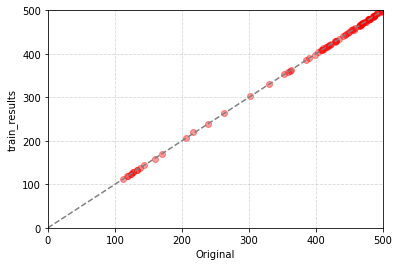

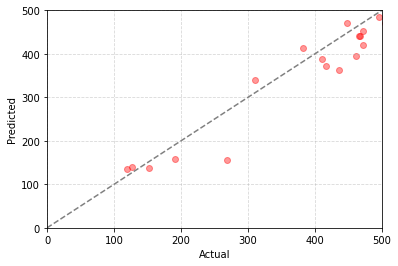

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

xgbm = xgb.XGBRegressor(random_state=s, seed=s)
scores_xgbm = cross_val_score(xgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_xgbm

fitted_model = xgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()